## Fashion Mnist Datasets

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"Tensorflow: {tf.__version__}")

Tensorflow: 2.15.0


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. Load data

In [65]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [66]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [67]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [68]:
X_train.dtype, y_train.dtype # integer type

(dtype('uint8'), dtype('uint8'))

In [69]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)

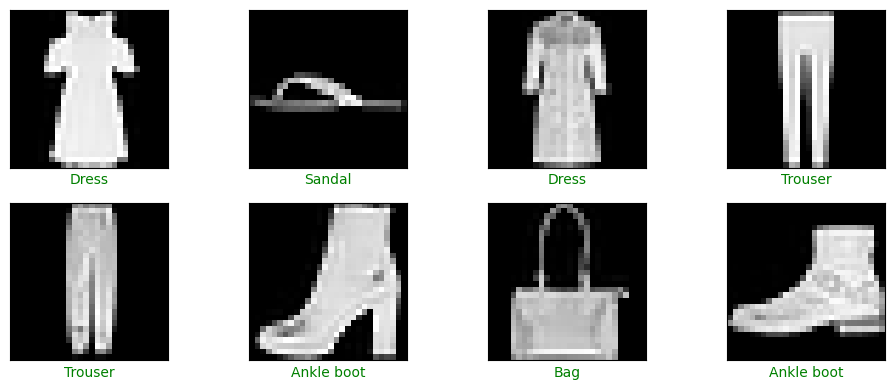

In [96]:
def plot_some_img(X:np.ndarray, y:np.ndarray, y_proba = None) -> None:
  nrows, ncols = 2, 4
  fig, ax = plt.subplots(nrows, ncols, figsize=(10, 4))
  for idx in range(nrows * ncols):
    axes = ax[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len(X))
    axes.imshow(X[img_idx], cmap = 'gray')
    axes.set(xticks = [], yticks = [])
    true_label = class_names[y[img_idx]]
    color = "green"
    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = "red" if predicted_idx != y[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"
    img_title = true_label if y_proba is None else true_label + predicted_label_str

    axes.set_xlabel(img_title, color = color)
  plt.tight_layout()
  plt.show()

plot_some_img(X_train, y_train)

## 2. Image Preprocessing

In [71]:
# convert to float32 and scale value of each pixel -> [0, 1]
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [72]:
X_train.dtype, X_train.shape

(dtype('float32'), (60000, 28, 28))

In [73]:
# Add chanel dimension (60000, 28, 28) -> (60000, 28, 28, 1)
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [74]:
X_train.shape

(60000, 28, 28, 1)

In [75]:
# one hot encoding label
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [76]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

## 3. Network (ANN) Architecture

In [77]:
input_shape = (28, 28, 1)

In [78]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # (28, 28, 1) -> (784)
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(class_nums, activation = 'softmax') # sum of vector equal to 1
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

In [80]:
epochs = 10
batch_size = 256

In [81]:
history = model.fit(X_train, y_train_label,
          epochs = epochs,
          batch_size=batch_size,
          validation_split=0.1
          )

Epoch 1/10
211/211 [==============================] - 4s 18ms/step - loss: 0.6414 - accuracy: 0.7677 - val_loss: 0.4754 - val_accuracy: 0.8182
Epoch 2/10
211/211 [==============================] - 4s 20ms/step - loss: 0.4168 - accuracy: 0.8458 - val_loss: 0.3782 - val_accuracy: 0.8622
Epoch 3/10
211/211 [==============================] - 5s 23ms/step - loss: 0.3623 - accuracy: 0.8646 - val_loss: 0.3827 - val_accuracy: 0.8620
Epoch 4/10
211/211 [==============================] - 4s 17ms/step - loss: 0.3316 - accuracy: 0.8757 - val_loss: 0.3535 - val_accuracy: 0.8703
Epoch 5/10
211/211 [==============================] - 4s 17ms/step - loss: 0.3060 - accuracy: 0.8855 - val_loss: 0.3355 - val_accuracy: 0.8823
Epoch 6/10
211/211 [==============================] - 5s 23ms/step - loss: 0.2886 - accuracy: 0.8922 - val_loss: 0.3440 - val_accuracy: 0.8758
Epoch 7/10
211/211 [==============================] - 4s 17ms/step - loss: 0.2737 - accuracy: 0.8966 - val_loss: 0.3234 - val_accuracy: 0.8845

In [82]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [83]:
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
train_accuracy, val_accuracy = history_dict["accuracy"], history_dict["val_accuracy"]

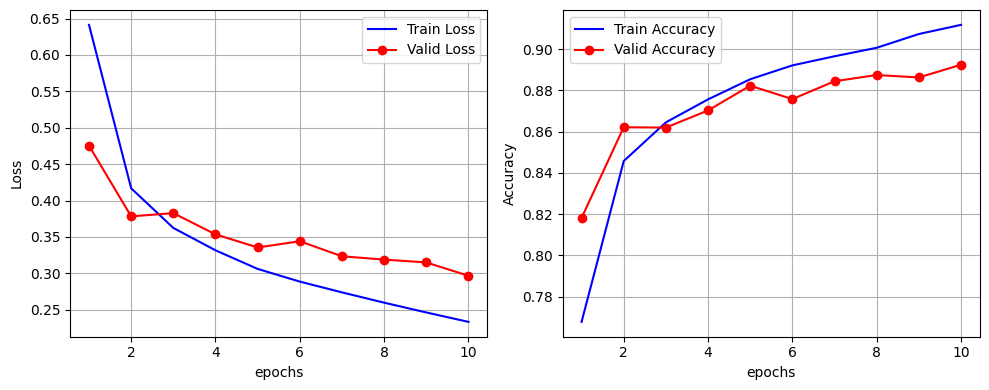

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

n_epochs = [i + 1 for i in range(epochs)]
ax1.plot(n_epochs, train_loss, "b-", label = "Train Loss")
ax1.plot(n_epochs, val_loss, "r-o", label = "Valid Loss")
ax1.grid()
ax1.set(xlabel = "epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(n_epochs, train_accuracy, "b-", label = "Train Accuracy")
ax2.plot(n_epochs, val_accuracy, "r-o", label = "Valid Accuracy")
ax2.grid()
ax2.set(xlabel = "epochs", ylabel = "Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Model Evaluation

In [86]:
scores = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.8857


In [87]:
print(f"Loss: {scores[0]:.3f}\nAccuracy: {scores[1]:.3f}")

Loss: 0.319
Accuracy: 0.886


In [88]:
y_proba = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [91]:
predictions = np.argmax(y_proba, axis = 1)

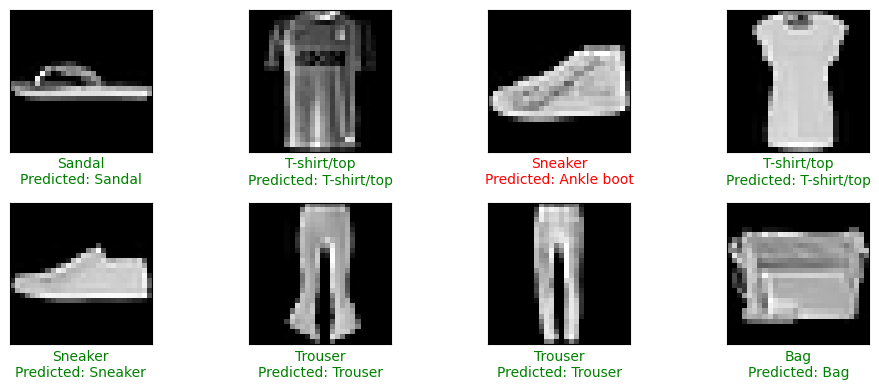

In [97]:
plot_some_img(X_test, y_test, y_proba)